In [29]:
!pip install statsmodels

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [31]:
df = pd.read_csv(r"..\Datasets\monthly-milk-production-pounds-p.csv")

In [32]:
series = df['Milk']
result = seasonal_decompose(series, model='additive', period=12)

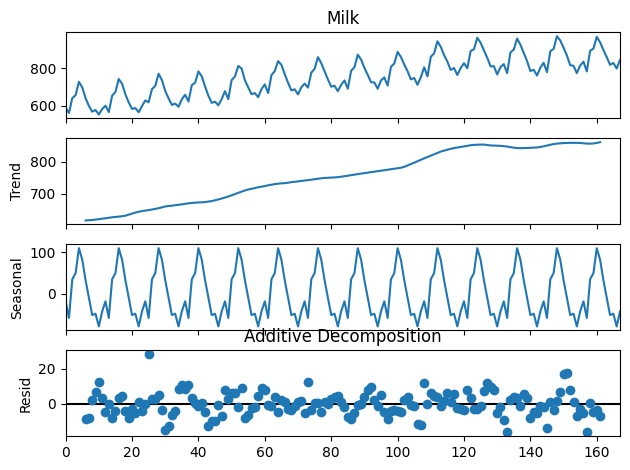

In [33]:
result.plot()
plt.title('Additive Decomposition')
plt.show()

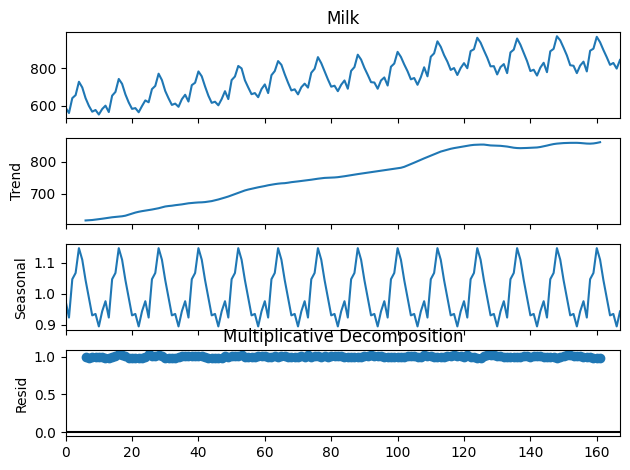

In [34]:
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.title('Multiplicative Decomposition')
plt.show()

In [35]:
df = pd.read_csv(r"..\Datasets\monthly-milk-production-pounds-p.csv")
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


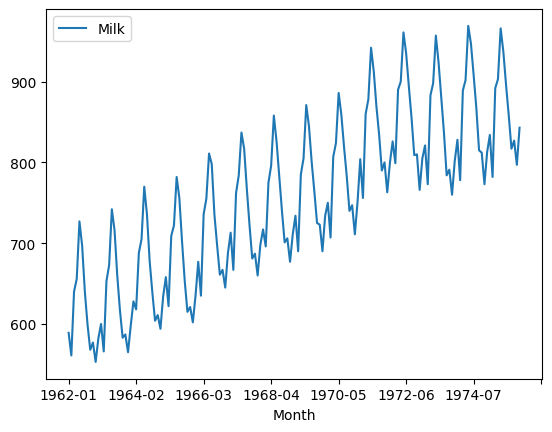

In [36]:
df.plot.line(x = 'Month', y = 'Milk')
plt.show()

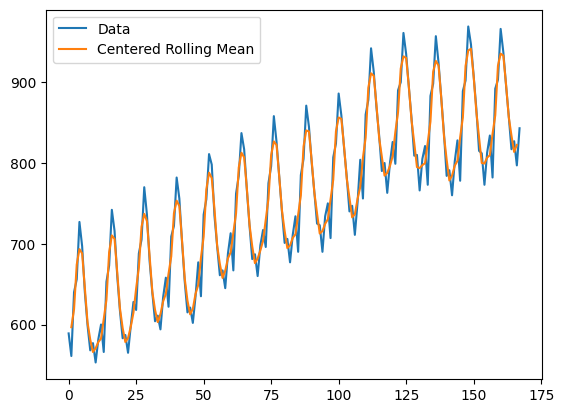

In [37]:
y = df['Milk']

span = 3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label = 'Data')
plt.plot(fcast, label = 'Centered Rolling Mean')
plt.legend(loc = 'best')
plt.show()

In [38]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

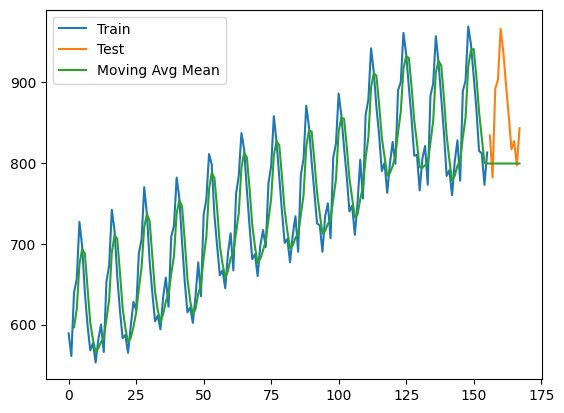

83.33766655400582


In [39]:
from math import sqrt


span = 3
fcast = y_train.rolling(span).mean()

MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)

plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Avg Mean')
plt.legend(loc = 'best')
plt.show()

res = sqrt(mean_squared_error(y_test, MA_series))
print(res)

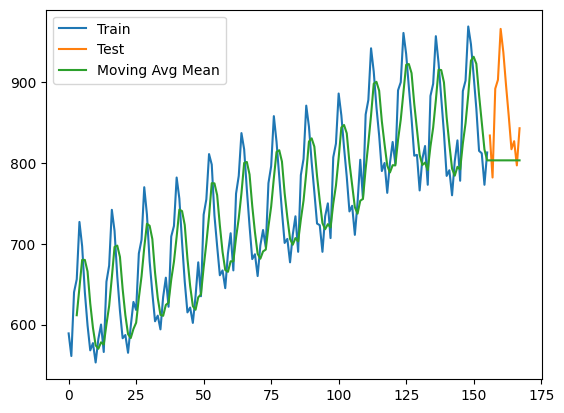

80.40146661183074


In [40]:
from math import sqrt


span = 4
fcast = y_train.rolling(span).mean()

MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)

plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Avg Mean')
plt.legend(loc = 'best')
plt.show()

res = sqrt(mean_squared_error(y_test, MA_series))
print(res)

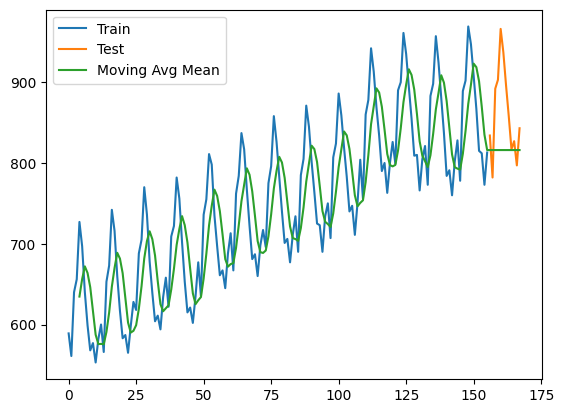

71.4970861877135


In [41]:
from math import sqrt


span = 5
fcast = y_train.rolling(span).mean()

MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)

plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Avg Mean')
plt.legend(loc = 'best')
plt.show()

res = sqrt(mean_squared_error(y_test, MA_series))
print(res)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


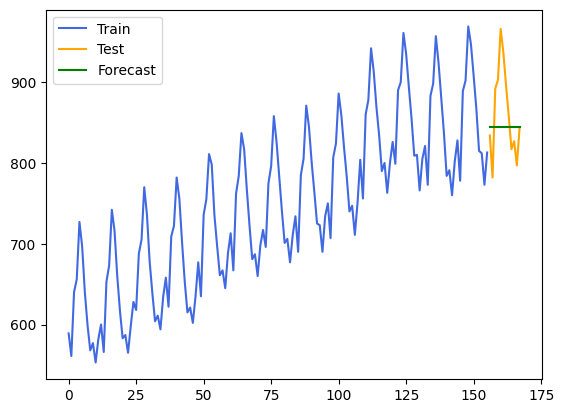

{'smoothing_level': 0.1, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
57.02407775273818


In [50]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
alpha = 0.1

from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


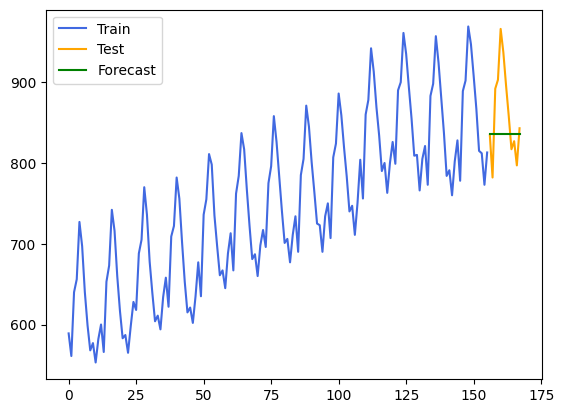

{'smoothing_level': 0.2, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
60.41719003278307


In [51]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
alpha = 0.2

from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


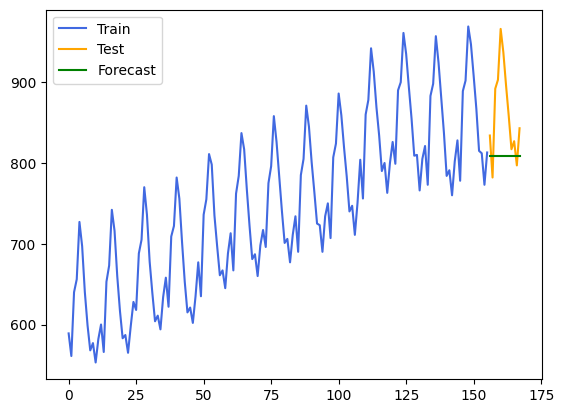

{'smoothing_level': 0.5, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
76.91666495915985


In [52]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
alpha = 0.5

from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


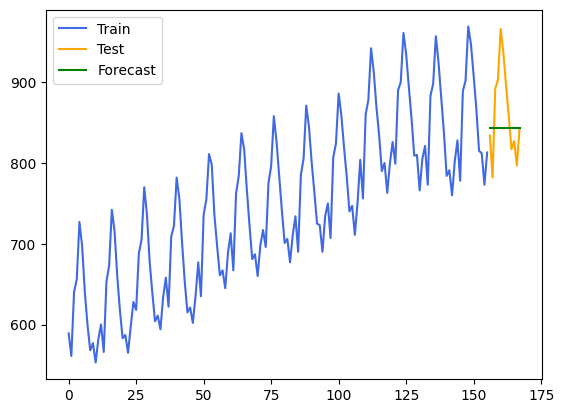

{'smoothing_level': 0.12, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
57.37806764498011


In [56]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
alpha = 0.12

from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)